In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/data-storm-6-0/train_storming_round.csv',parse_dates=['year_month','agent_join_month'])

In [25]:
pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)
df.set_index('row_id',inplace=True)

In [26]:
df.sample(3)

,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,time_to_first_sale,performance_cluster
row_id,,,,,,,,,,,,,,,,,,,,,,,,
15015,93a839c4,44,2022-09-01,2024-03-01,2024-08-01,0,1,11,17,0,6,4,16,2,6,7,15,23,1290070,250903,30,115,547,1
328,428ca558,48,2019-11-01,2023-11-01,2023-01-01,1,2,2,6,3,4,8,16,5,7,10,22,0,0,40702,88,66,1461,0
8732,cd1f2573,26,2021-04-01,2023-08-01,2024-01-01,3,5,20,33,0,5,4,10,1,9,9,19,36,1973484,363570,76,288,852,2


# 1. Key Metrics & Distributions

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15308 entries, 1 to 15308
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   agent_code                       15308 non-null  object        
 1   agent_age                        15308 non-null  int64         
 2   agent_join_month                 15308 non-null  datetime64[ns]
 3   first_policy_sold_month          15308 non-null  datetime64[ns]
 4   year_month                       15308 non-null  datetime64[ns]
 5   unique_proposals_last_7_days     15308 non-null  int64         
 6   unique_proposals_last_15_days    15308 non-null  int64         
 7   unique_proposals_last_21_days    15308 non-null  int64         
 8   unique_proposal                  15308 non-null  int64         
 9   unique_quotations_last_7_days    15308 non-null  int64         
 10  unique_quotations_last_15_days   15308 non-null  int64         

In [28]:
df.describe()

,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,unique_quotations_last_7_days,unique_quotations_last_15_days,unique_quotations_last_21_days,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,time_to_first_sale,performance_cluster
count,15308.000000,15308,15308,15308,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,1.530800e+04,1.530800e+04,15308.000000,15308.000000,15308.000000,15308.000000
mean,40.585772,2021-05-23 01:43:05.941991168,2023-04-24 01:41:52.568591616,2023-11-03 05:31:24.191272704,1.491246,2.991116,10.045728,17.516527,1.989679,2.996538,4.469624,13.922394,2.995493,4.997714,7.500523,15.493729,20.269990,1.025338e+06,2.280414e+05,30.968317,101.180886,700.999151,0.757643
min,20.000000,2019-04-01 00:00:00,2022-01-01 00:00:00,2023-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.160000e+03,0.000000,0.000000,-91.000000,0.000000
25%,31.000000,2020-03-01 00:00:00,2022-10-01 00:00:00,2023-06-01 00:00:00,0.000000,1.000000,5.000000,12.000000,1.000000,1.000000,2.000000,11.000000,2.000000,3.000000,5.000000,12.000000,15.000000,3.473238e+05,9.282500e+04,12.000000,38.000000,304.000000,0.000000
50%,41.000000,2021-05-01 00:00:00,2023-06-01 00:00:00,2023-11-01 00:00:00,1.000000,3.000000,10.000000,17.000000,2.000000,3.000000,4.000000,14.000000,3.000000,5.000000,8.000000,15.000000,21.000000,9.031445e+05,1.899740e+05,28.000000,90.000000,668.000000,1.000000
75%,51.000000,2022-07-01 00:00:00,2023-12-01 00:00:00,2024-04-01 00:00:00,2.000000,5.000000,15.000000,23.000000,3.000000,5.000000,7.000000,17.000000,4.000000,7.000000,10.000000,19.000000,27.000000,1.560700e+06,3.217448e+05,48.000000,152.000000,1065.000000,1.000000
max,60.000000,2024-07-01 00:00:00,2024-04-01 00:00:00,2024-08-01 00:00:00,3.000000,6.000000,20.000000,34.000000,4.000000,6.000000,9.000000,32.000000,6.000000,10.000000,15.000000,31.000000,42.000000,3.933840e+06,1.140237e+06,116.000000,378.000000,1827.000000,2.000000
std,11.688204,NaN,NaN,NaN,1.119554,2.001613,6.037296,6.616954,1.420996,2.004386,2.875329,4.663777,1.644117,2.438918,3.468597,4.542321,9.541693,8.054989e+05,1.736671e+05,24.621933,75.323464,464.414165,0.756015


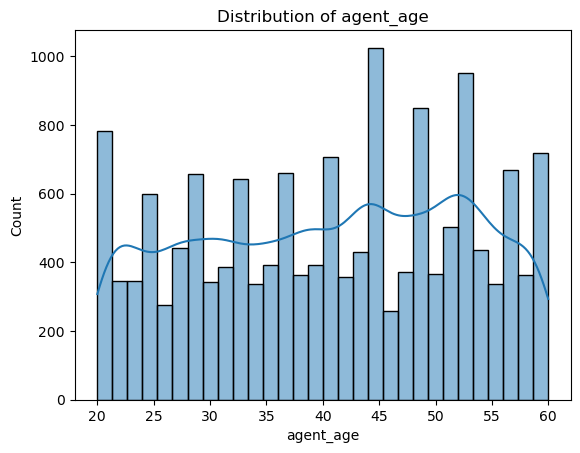

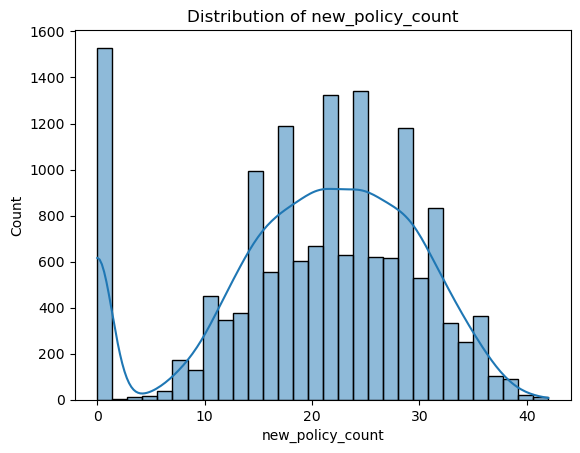

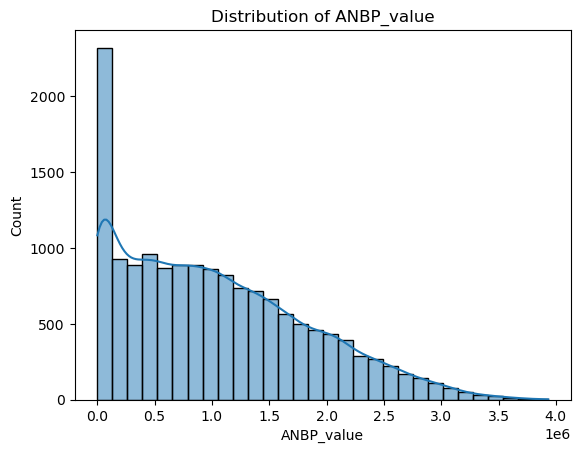

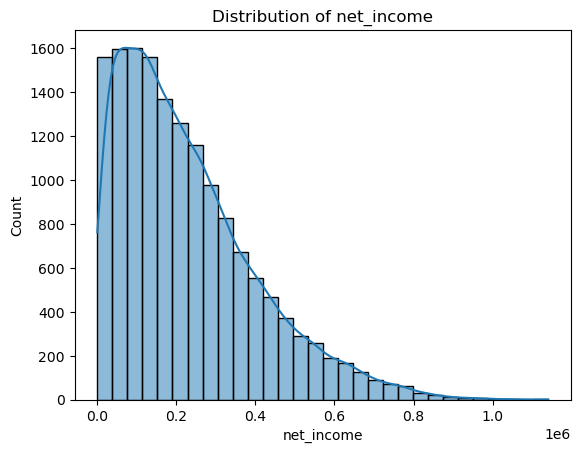

In [15]:
# Histograms of main features
features = ['agent_age', 'new_policy_count', 'ANBP_value', 'net_income']
for col in features:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

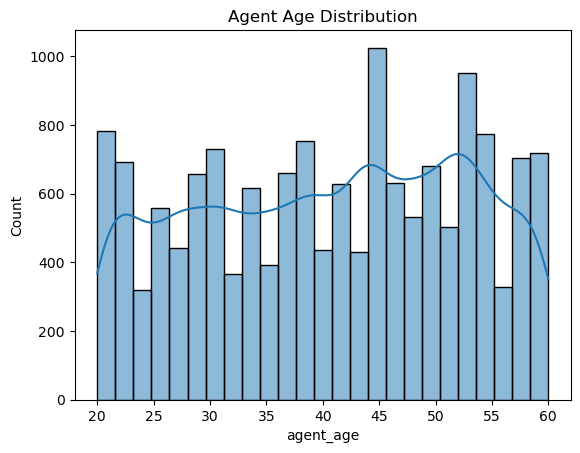

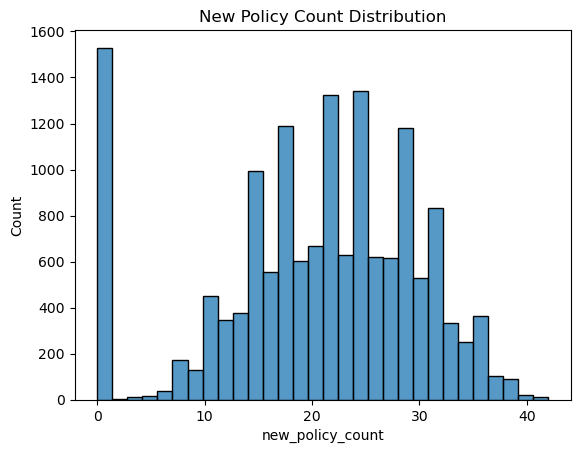

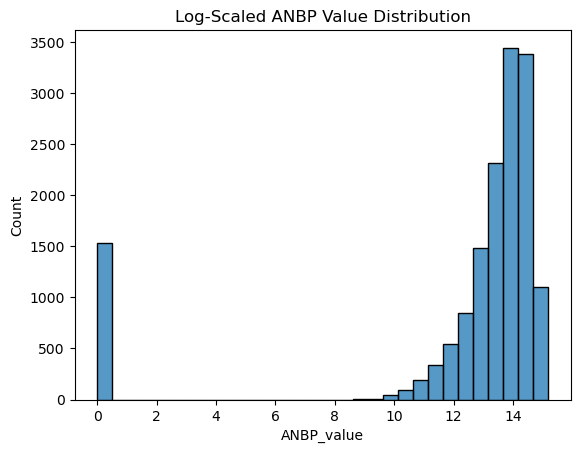

In [29]:
df.describe()

# Distribution of age
sns.histplot(df['agent_age'], kde=True)
plt.title("Agent Age Distribution")
plt.show()

# Distribution of new policy counts
sns.histplot(df['new_policy_count'], bins=30)
plt.title("New Policy Count Distribution")
plt.show()

# Distribution of ANBP_value (log scale for skew)
sns.histplot(np.log1p(df['ANBP_value']), bins=30)
plt.title("Log-Scaled ANBP Value Distribution")
plt.show()


#  2. Monthly Sales Patterns (Time Series Analysis)

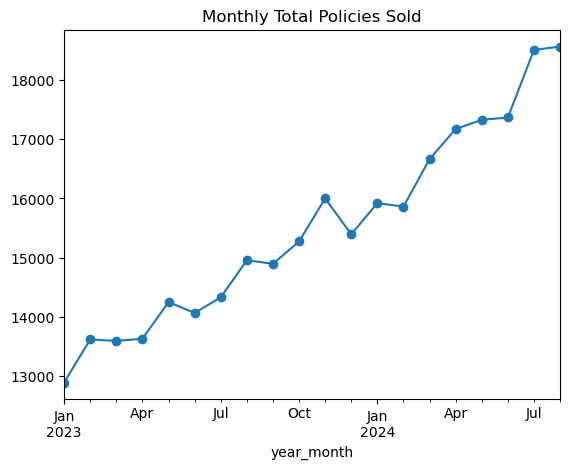

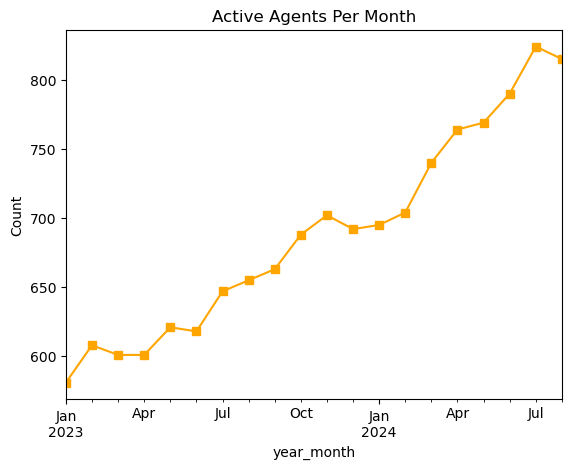

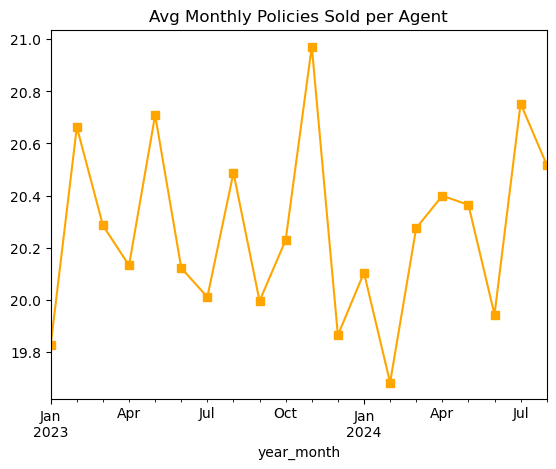

In [33]:
# Convert year_month to datetime
df['year_month'] = pd.to_datetime(df['year_month'])

# Monthly total policies sold
monthly_policy_sales = df.groupby('year_month')['new_policy_count'].sum()
monthly_policy_sales.plot(marker='o')
plt.title("Monthly Total Policies Sold")
plt.show()

# Active agents per month
active_agents = df[df['new_policy_count'] > 0].groupby('year_month')['agent_code'].nunique()
active_agents.plot(marker='s', color='orange')
plt.title("Active Agents Per Month")
plt.ylabel("Count")
plt.show()

# Average policies sold per agent
avg_sales = df.groupby('year_month')['new_policy_count'].mean()
avg_sales.plot(marker='s', color='orange')
plt.title("Avg Monthly Policies Sold per Agent")
plt.show()

# 3. Multivariate Analysis

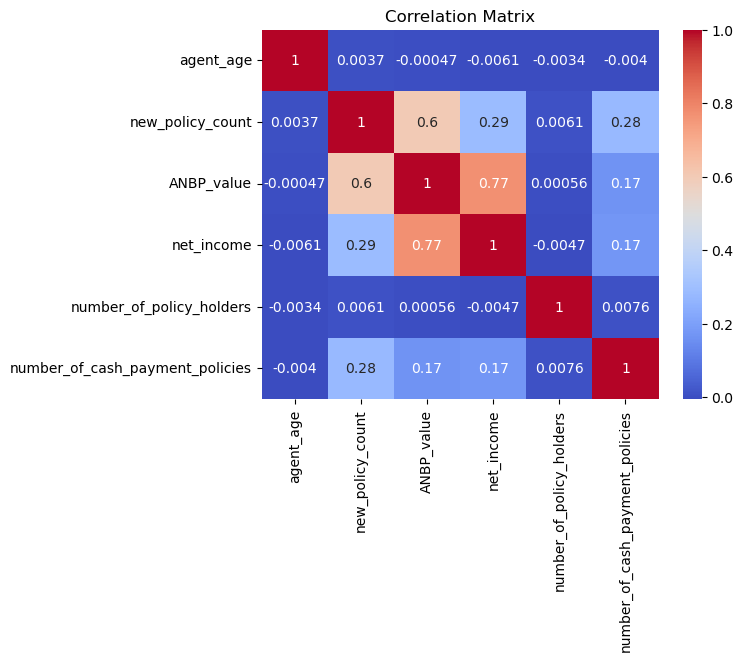

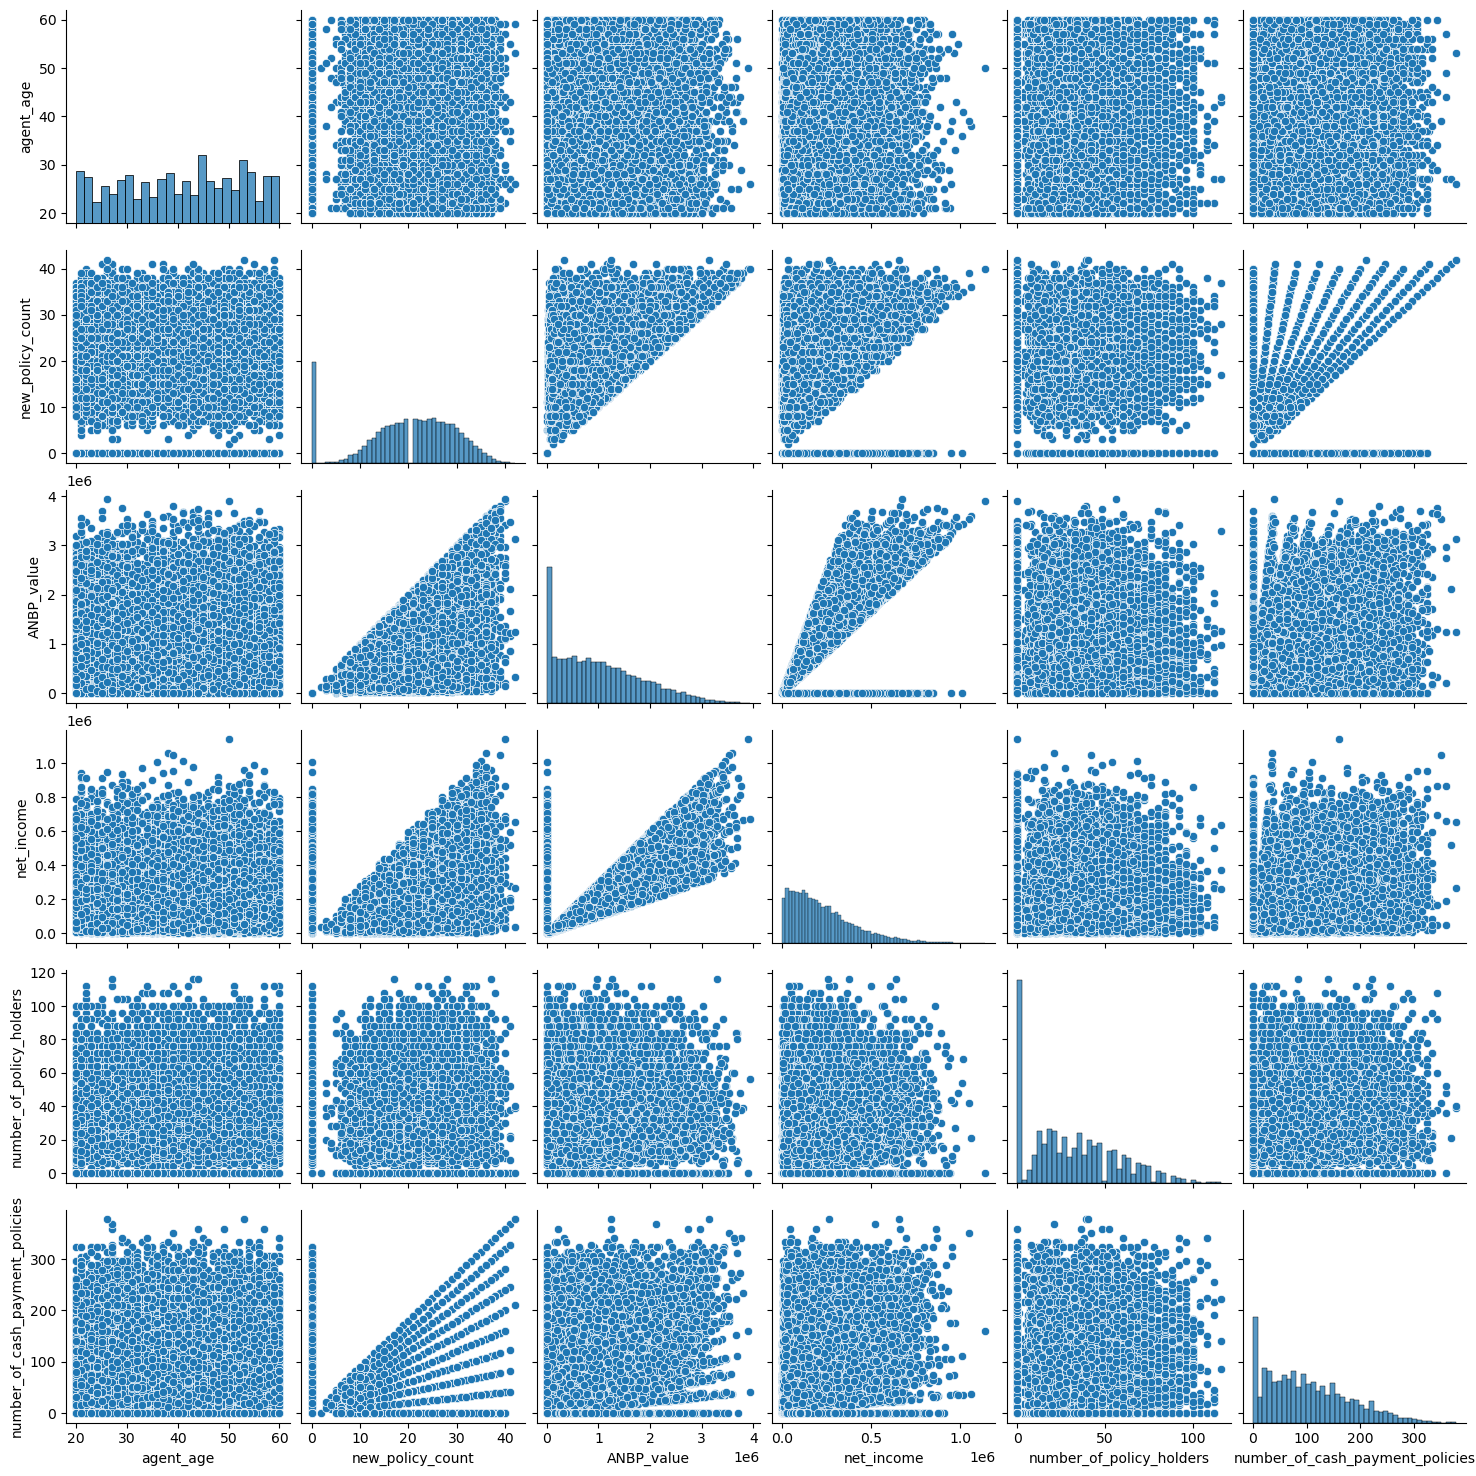

In [41]:
# Correlation matrix of numerical columns
numerical_cols = ['agent_age', 'new_policy_count', 'ANBP_value', 'net_income',
                  'number_of_policy_holders', 'number_of_cash_payment_policies']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot
sns.pairplot(df[numerical_cols])
plt.show()

#  4. Agent Trajectories Over Time

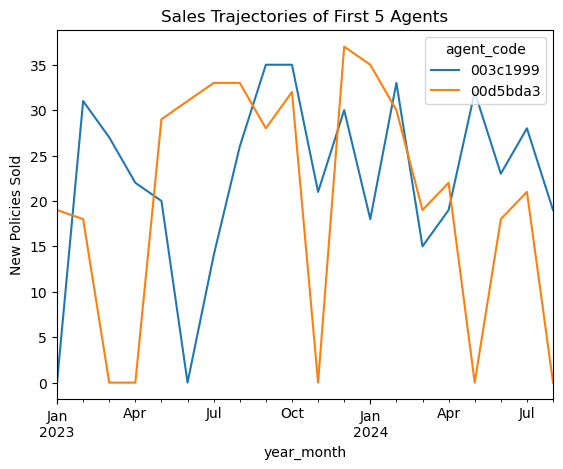

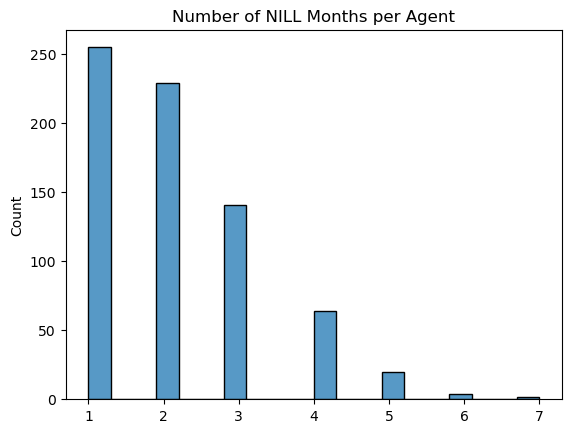

In [49]:
# Agent monthly pivot
pivot = df.pivot_table(index='year_month', columns='agent_code', values='new_policy_count', aggfunc='sum')
pivot.iloc[:, :2].plot()
plt.title("Sales Trajectories of First 5 Agents")
plt.ylabel("New Policies Sold")
plt.show()

# Count how many months each agent went NILL (0 sales)
nill_counts = df[df['new_policy_count'] == 0].groupby('agent_code').size()
sns.histplot(nill_counts, bins=20)
plt.title("Number of NILL Months per Agent")
plt.show()

# 5. Innovative EDA (Hidden Insights)

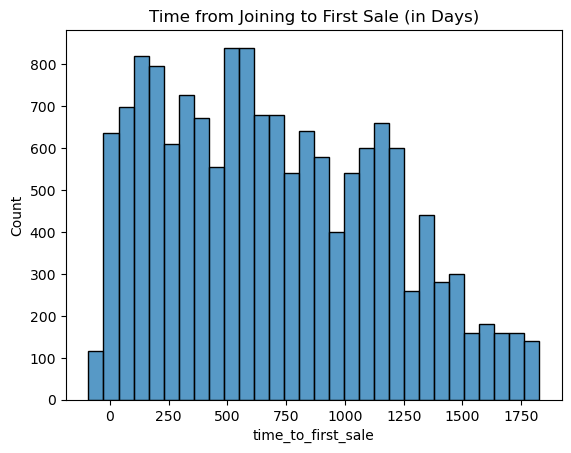

In [13]:
# 5. Innovative EDA Ideas
# Time-to-First-Sale
df['agent_join_month'] = pd.to_datetime(df['agent_join_month'])
df['first_policy_sold_month'] = pd.to_datetime(df['first_policy_sold_month'])
df['time_to_first_sale'] = (df['first_policy_sold_month'] - df['agent_join_month']).dt.days

sns.histplot(df['time_to_first_sale'], bins=30)
plt.title("Time from Joining to First Sale (in Days)")
plt.show()


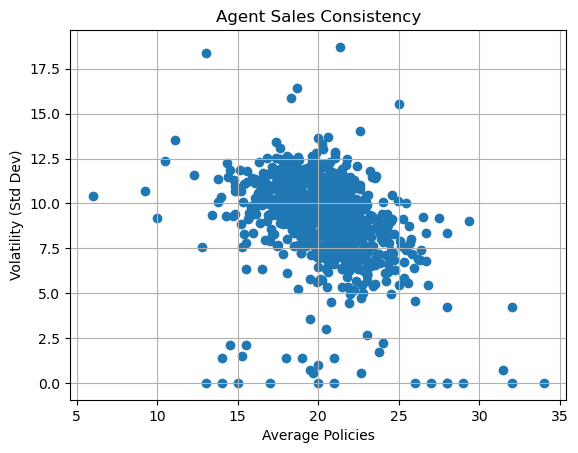

In [51]:
#Sales Volatility
agent_std = df.groupby('agent_code')['new_policy_count'].std().fillna(0)
agent_avg = df.groupby('agent_code')['new_policy_count'].mean()

plt.scatter(agent_avg, agent_std)
plt.xlabel("Average Policies")
plt.ylabel("Volatility (Std Dev)")
plt.title("Agent Sales Consistency")
plt.grid(True)
plt.show()

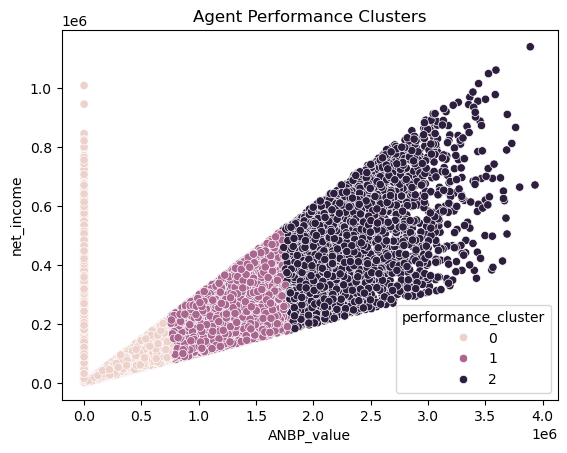

In [56]:
#Performance Clustering (Bonus)

from sklearn.cluster import KMeans

features = df[['new_policy_count', 'ANBP_value', 'net_income']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
df['performance_cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='ANBP_value', y='net_income', hue='performance_cluster')
plt.title("Agent Performance Clusters")
plt.show()
